In [4]:
# import pandas as pd
# data = pd.read_csv('/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data.csv')
# data.head()

import pandas as pd
import seaborn as sns
import sqlite3
import csv

# Create the connection
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')
unique_species = pd.read_sql_query("SELECT DISTINCT SPECIESTAXID FROM speciesdb", cnx)
print(unique_species.size)
head = pd.read_sql_query("SELECT * FROM speciesdb", cnx)
head.head()
# num = pd.read_sql_query("SELECT MAX(avg_length_chromosomes) FROM speciesdb", cnx)
# print(num)
plasmid = (pd.read_sql_query("SELECT * FROM speciesdb where chromosome_count =0 and contig_count = 0", cnx))

print(plasmid.head())


1228
   GENUSTAXID    GENUSNAME  SPECIESTAXID                   SPECIESNAME  \
0      5094.0  Talaromyces         37727         Talaromyces marneffei   
1      5094.0  Talaromyces         28564        Talaromyces stipitatus   
2      5027.0  Pyrenophora         45151  Pyrenophora tritici-repentis   
3     55193.0   Malassezia         76773            Malassezia globosa   
4      5529.0  Metarhizium        568076         Metarhizium robertsii   

   STRAINTAXID STRAINNAME DBNAME  \
0          NaN              NCBI   
1          NaN              NCBI   
2          NaN              NCBI   
3          NaN              NCBI   
4          NaN              NCBI   

                                            FILEPATH  chromosome_count  \
0  /u/home/a/akarlsbe/scratch/fungi/NCBI/GCF_0000...                 0   
1  /u/home/a/akarlsbe/scratch/fungi/NCBI/GCF_0000...                 0   
2  /u/home/a/akarlsbe/scratch/fungi/NCBI/GCF_0001...                 0   
3  /u/home/a/akarlsbe/scratch/fungi/N

# ENSEMBLE

In [5]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

# Create the connection
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

# create the dataframe from a query
ensembl_species = pd.read_sql_query("SELECT DISTINCT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx)
print ('Total number of fungi species in ensembl database: ',ensembl_species.size)

Total number of fungi species in ensembl database:  541


In [6]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

# Create the connection
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ensembl_chr = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count == 0", cnx).size
ensembl_contig = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count == 0 AND contig_count >0", cnx).size
ensembl_chrom_and_contig = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count > 0", cnx).size

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

ensemble_dict = {"only_chromosomes": ensembl_chr, "only_contig": ensembl_contig, "chrom_and_contig": chrom_and_contig}
index = {"ENSEMBLE"}
df = pd.DataFrame(ensemble_dict, index=index)
ax = df.plot.bar(rot=0, title ="DNA Sequence Classification")
ax.legend(borderaxespad=0.5, loc=2, bbox_to_anchor=(1.05, 1))

g=sns.despine()
plt.show(g)

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

print("ensemble species with only chromosomes:", ensembl_chr)
print("ensemble species with only contigs:", ensembl_contig)
print("species that contain both chromosomes and contigs:", chrom_and_contig)

ValueError: Shape of passed values is (3, 3), indices imply (3, 1)

# NCBI

In [7]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi_chr = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count == 0", cnx).size
ncbi_contig = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count == 0 AND contig_count >0", cnx).size
ncbi_chrom_and_contig = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count > 0", cnx).size

ncbi_total = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
print(ncbi_total)

ncbi_dict = {"only_chromosomes": ncbi_chr, "only_contig": ncbi_contig, "chrom_and_contig": chrom_and_contig}
index = {"NCBI"}


import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

df = pd.DataFrame(ncbi_dict, index=index)
ax = df.plot.bar(rot=0, title ="DNA Sequence Classification")
ax.legend(borderaxespad=0.5, loc=2, bbox_to_anchor=(1.05, 1))

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

g=sns.despine()
plt.show(g)

print("NCBI species with only chromosomes:", ncbi_chr)
print("NCBI species with only contigs:", ncbi_contig )
print("NCBI that contain both chromosomes and contigs:", chrom_and_contig)



277


ValueError: Shape of passed values is (3, 3), indices imply (3, 1)

# 1k

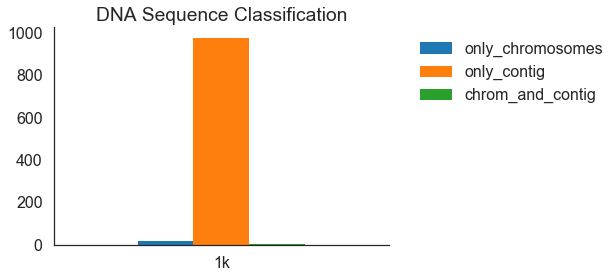

1k species with only chromosomes: 15
1k species with only contigs: 978
1k that contain both chromosomes and contigs: 4


In [8]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

onek_chr = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count == 0", cnx).size
onek_contig = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND chromosome_count == 0 AND contig_count >0", cnx).size
chrom_and_contig = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count > 0", cnx).size


import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

onek_dict = {"only_chromosomes": onek_chr, "only_contig": onek_contig, "chrom_and_contig": chrom_and_contig}
index = {"1k"}
df = pd.DataFrame(onek_dict, index=index)
ax = df.plot.bar(rot=0, title ="DNA Sequence Classification")
ax.legend(borderaxespad=0.5, loc=2, bbox_to_anchor=(1.05, 1))

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

g=sns.despine()
plt.show(g)

print("1k species with only chromosomes:", onek_chr)
print("1k species with only contigs:", onek_contig )
print("1k that contain both chromosomes and contigs:", chrom_and_contig)

# Combined DNA Type Breakdown (ENSEMBL, 1K, NCBI)

In [9]:
        # [ENSEMBLE, NCBI, 1k]
    

only_chr = [150, 65, 15]
only_contig = [618, 193, 978]
contig_and_chr = [43,10,4]

    # Chr. Contig. Mix of Chrom and Contig.
ENS = [150, 618, 43]
NCBI = [65, 193, 10]
ONEK = [15, 978, 4]
index = ['ENSEMBL', 'NCBI', '1K']


# df = pd.DataFrame({'Ensembl': only_chr,'NCBI': only_contig, '1K': contig_and_chr}, index=index)
# ax = df.plot.bar(rot=0, figsize=(10, 8))




[ENSEMBLE, NCBI, 1k, FUNGIDB]
chrom: [18.495684340320594, 23.465703971119133, 1.4150943396226416, 13.432835820895523]
contig: [76.20221948212084, 69.67509025270758, 92.26415094339623, 79.8507462686567]
chrom_and_contig [5.30209617755857, 6.830108303249098, 6.312358490566037, 6.7164179104477615]


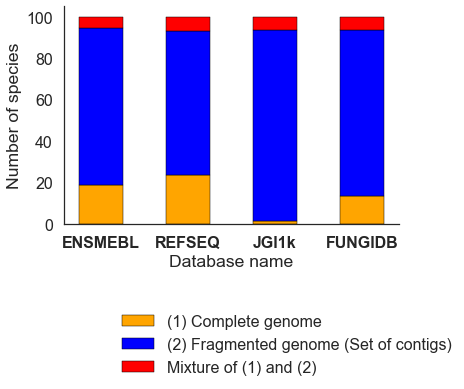

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd
import sqlite3
 
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ensembl_total = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
ensembl_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count == 0", cnx).size / ensembl_total)*100
ensembl_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count == 0 AND contig_count >0", cnx).size / ensembl_total)*100
ensembl_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count > 0", cnx).size / ensembl_total)*100

ncbi_total = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
ncbi_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count == 0", cnx).size / ncbi_total)*100
ncbi_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count == 0 AND contig_count >0", cnx).size / ncbi_total)*100
ncbi_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count > 0", cnx).size / ncbi_total)*100


onek_total = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K'", cnx).size
onek_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count == 0", cnx).size / onek_total)*100
onek_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND chromosome_count == 0 AND contig_count >0", cnx).size / onek_total)*100
onek_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count > 0", cnx).size / onek_total)*100

fungidb_total = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB'", cnx).size
fungidb_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB' AND chromosome_count > 0 AND contig_count == 0", cnx).size / fungidb_total)*100
fungidb_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB' AND chromosome_count == 0 AND contig_count >0", cnx).size / fungidb_total)*100
fungidb_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB' AND chromosome_count > 0 AND contig_count > 0", cnx).size / fungidb_total)*100


# [ENSEMBLE, NCBI, 1k]
chrom = [ensembl_chr, ncbi_chr, onek_chr, fungidb_chr]
contig = [ensembl_contig, ncbi_contig, onek_contig, fungidb_contig]
chrom_and_contig = [ensembl_chrom_and_contig ,ncbi_chrom_and_contig + 3.22, onek_chrom_and_contig+ 5.935, fungidb_chrom_and_contig]


print("[ENSEMBLE, NCBI, 1k, FUNGIDB]")
print("chrom:", chrom) 
print("contig:", contig) 
print("chrom_and_contig", chrom_and_contig)

# Heights of chrom + contig
bars = [ensembl_chr + ensembl_contig, ncbi_chr + ncbi_contig, onek_chr + onek_contig, fungidb_chr + fungidb_contig]

# Heights of chrom + contig + mixture
# bars2 = [bars[0] + ensembl_chrom_and_contig , bars[1] +ncbi_chrom_and_contig, bars[2] + onek_chrom_and_contig]

# The position of the bars on the x-axis
r = [0,2,4,6]

# Names of group and bar width
names = ['ENSMEBL','REFSEQ','JGI1k','FUNGIDB']
barWidth = 1

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for chromosomes
p1 = plt.bar(r, chrom, color='orange', edgecolor='black', width=barWidth)
# Create blue bars (middle), on top of the firs ones for contigs
p2 = plt.bar(r, contig, bottom=chrom, color='blue', edgecolor='black', width=barWidth)
# Create red bars (second from top)
p3 = plt.bar(r, chrom_and_contig, bottom=bars, color='red', edgecolor='black', width=barWidth)


# create green bars (top) containing plasmid sequences
# p4 = plt.bar(r, other, bottom=bars2, color='green', edgecolor='black', width=barWidth)


# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")

# Custom Y axis
plt.ylabel("Number of species")

#  legend
plt.legend((p1[0], p2[0], p3[0]), ('(1) Complete genome', '(2) Fragmented genome (Set of contigs)', 'Mixture of (1) and (2)'), bbox_to_anchor=(1.2, -0.35),frameon=False)




g=sns.despine()
plt.savefig("contigs.vs.chr.pdf", bbox_inches='tight')

# Mitochondria Composition

ensembl_species 811
277
1060
134
ensembl_mt_species 158
NCBI_mt_species 47
OneK_mt_species 0
fungidb_mt_species 53
[ENSEMBLE, NCBI, 1k, FUNGIDB] percent mitochondria present
[ENSEMBLE, NCBI, 1k, FUNGIDB]
proportion_mt [19.482120838471022, 16.967509025270758, 25.493885230479773, 39.552238805970148]
proportion_NO_mt [80.517879161528981, 83.032490974729242, 74.50611476952022, 60.447761194029852]


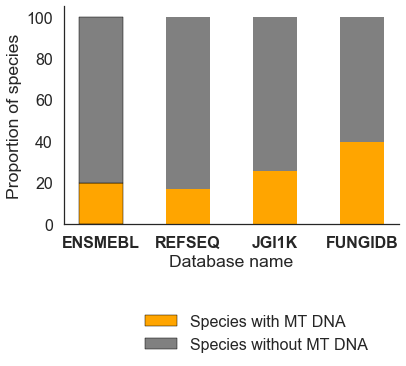

In [4]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd
import seaborn as sns


cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')


ensembl_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
NCBI_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
OneK_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K'", cnx).size
fungidb_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB'", cnx).size



ensembl_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND mtDNA_count > 0", cnx).size
NCBI_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND mtDNA_count > 0", cnx).size
OneK_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND mtDNA_count > 0", cnx).size
fungidb_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB' AND mtDNA_count > 0", cnx).size



prop_ensembl_with_mt = (ensembl_mt_species / float(ensembl_species) ) * 100.0
prop_NCBI_with_mt = (NCBI_mt_species / float(NCBI_species) ) * 100.0
# prop_1K_with_mt = (OneK_mt_species / float(OneK_species) ) * 100.0
prop_1K_with_mt = 271/1063 * 100.0
prop_fungidb_with_mt = (fungidb_mt_species/ float(fungidb_species) ) * 100.0 


print("ensembl_species",ensembl_species)
print(NCBI_species)
print(OneK_species)
print(fungidb_species)

print("ensembl_mt_species",ensembl_mt_species)
print("NCBI_mt_species",NCBI_mt_species)
print("OneK_mt_species",OneK_mt_species)
print("fungidb_mt_species", fungidb_mt_species)

    # [ENSEMBLE, NCBI, 1k]
proportion_mt = [prop_ensembl_with_mt, prop_NCBI_with_mt, prop_1K_with_mt, prop_fungidb_with_mt]
proportion_no_mt = [100 - prop_ensembl_with_mt, 100 - prop_NCBI_with_mt, 100 - prop_1K_with_mt, 100 - prop_fungidb_with_mt]

print("[ENSEMBLE, NCBI, 1k, FUNGIDB] percent mitochondria present")
print("[ENSEMBLE, NCBI, 1k, FUNGIDB]")
print("proportion_mt", proportion_mt)
print("proportion_NO_mt", proportion_no_mt)


# The position of the bars on the x-axis
r = [0,2,4,6]
 
# Names of group and bar width
names = ['ENSMEBL','REFSEQ','JGI1K', "FUNGIDB"]
barWidth = 1
 

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for chromosomes
p1 = plt.bar(r, proportion_mt, color='orange', edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the firs ones for contigs
p2 = plt.bar(r, proportion_no_mt, bottom=proportion_mt, color='grey', edgecolor='black', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")

# Custom Y axis
plt.ylabel("Proportion of species")

#  legend
plt.legend((p1[0], p2[0]), ('Species with MT DNA', 'Species without MT DNA'),bbox_to_anchor=(0.95, -0.35),frameon=False)

g=sns.despine()
plt.savefig("MT.png", bbox_inches='tight')

# Plasmid Composition 

811
277
1060
134
77
1
0
0
[ENSEMBLE, NCBI, 1k, FUNGIDB]
[9.494451294697903, 0.36101083032490977, 0.0, 0.0]


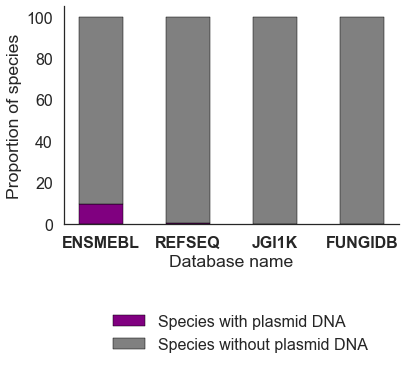

In [4]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ensembl_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
NCBI_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
OneK_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K'", cnx).size
fungidb_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB'", cnx).size


ensembl_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND plasmid_count > 0", cnx).size
NCBI_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND plasmid_count > 0", cnx).size
OneK_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND plasmid_count > 0", cnx).size
fungidb_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB' AND plasmid_count > 0", cnx).size


prop_ensembl_with_plasmid = (ensembl_plasmid_species / float(ensembl_species) ) * 100
prop_NCBI_with_plasmid = (NCBI_plasmid_species / float(NCBI_species) ) * 100
prop_1K_with_plasmid = (OneK_plasmid_species / float(OneK_species) ) * 100
prop_fungidb_with_plasmid = (fungidb_plasmid_species / float(fungidb_species) ) * 100

print(ensembl_species)
print(NCBI_species)
print(OneK_species)
print(fungidb_species)

print(ensembl_plasmid_species)
print(NCBI_plasmid_species)
print(OneK_plasmid_species)
print(fungidb_plasmid_species)


    # [ENSEMBLE, NCBI, 1k]
proportion_plasmid = [prop_ensembl_with_plasmid, prop_NCBI_with_plasmid, prop_1K_with_plasmid, prop_fungidb_with_plasmid]
proportion_no_plasmid = [100 - prop_ensembl_with_plasmid, 100 - prop_NCBI_with_plasmid, 100 - prop_1K_with_plasmid, 100 - prop_fungidb_with_plasmid ]

print("[ENSEMBLE, NCBI, 1k, FUNGIDB]")
print(proportion_plasmid)
# The position of the bars on the x-axis
r = [0,2,4,6]
 
# Names of group and bar width
names = ['ENSMEBL','REFSEQ','JGI1K', 'FUNGIDB']
barWidth = 1

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for plasmid dna
p1 = plt.bar(r, proportion_plasmid, color='purple', edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the first ones for other
p2 = plt.bar(r, proportion_no_plasmid, bottom=proportion_plasmid, color='grey', edgecolor='black', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")
 
# Custom Y axis
plt.ylabel("Proportion of species")

#  legend
plt.legend((p1[0], p2[0]), ('Species with plasmid DNA', 'Species without plasmid DNA'),bbox_to_anchor=(0.95, -0.35),frameon=False)



g=sns.despine()
plt.savefig("plasmid.pdf", bbox_inches='tight')

/# PIE CHART  COMPOSITION: Species count and Genus

In [13]:
# import pandas as pd
# import seaborn as sns
# import sqlite3
# import csv
# cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')
# ensembl_species = pd.read_sql_query("SELECT DISTINCT SPECIESTAXIDTAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
# NCBI_species = pd.read_sql_query("SELECT DISTINCT SPECIESTAXIDTAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
# OneK_species = pd.read_sql_query("SELECT DISTINCT SPECIESTAXIDTAXID FROM speciesdb where dbname = '1K'", cnx).size

# print("SpeciesCount")

# print(ensembl_species)
# print(NCBI_species)
# print(OneK_species)

# ensembl_genus = pd.read_sql_query("SELECT DISTINCT GenusName FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
# NCBI_genus = pd.read_sql_query("SELECT DISTINCT GenusName FROM speciesdb where dbname = 'NCBI'", cnx).size
# OneK_genus = pd.read_sql_query("SELECT DISTINCT GenusName FROM speciesdb where dbname = '1K'", cnx).size

# print("GenusCount")
# print(ensembl_genus)
# print(NCBI_genus)
# print(OneK_genus)


# df = pd.DataFrame({'NumSpecies': [ensembl_species, NCBI_species , OneK_species],'NumGenus': [ensembl_genus, NCBI_genus,OneK_genus]},
#                   index=['Ensembl', 'NCBI', '1K'])
# # plot = df.plot.pie(y='NumSpecies', figsize=(8, 8))
# # plot = df.plot.pie(subplots=True, figsize=(16, 8))

# plot = df.plot.pie(autopct='%1.0f%%', labeldistance=1.2, fontsize=10, subplots=True, figsize=(16, 8))

# SPECIES contained in three, two and one database: PIE CHART

134
46
28
809
222
153
16
614
158


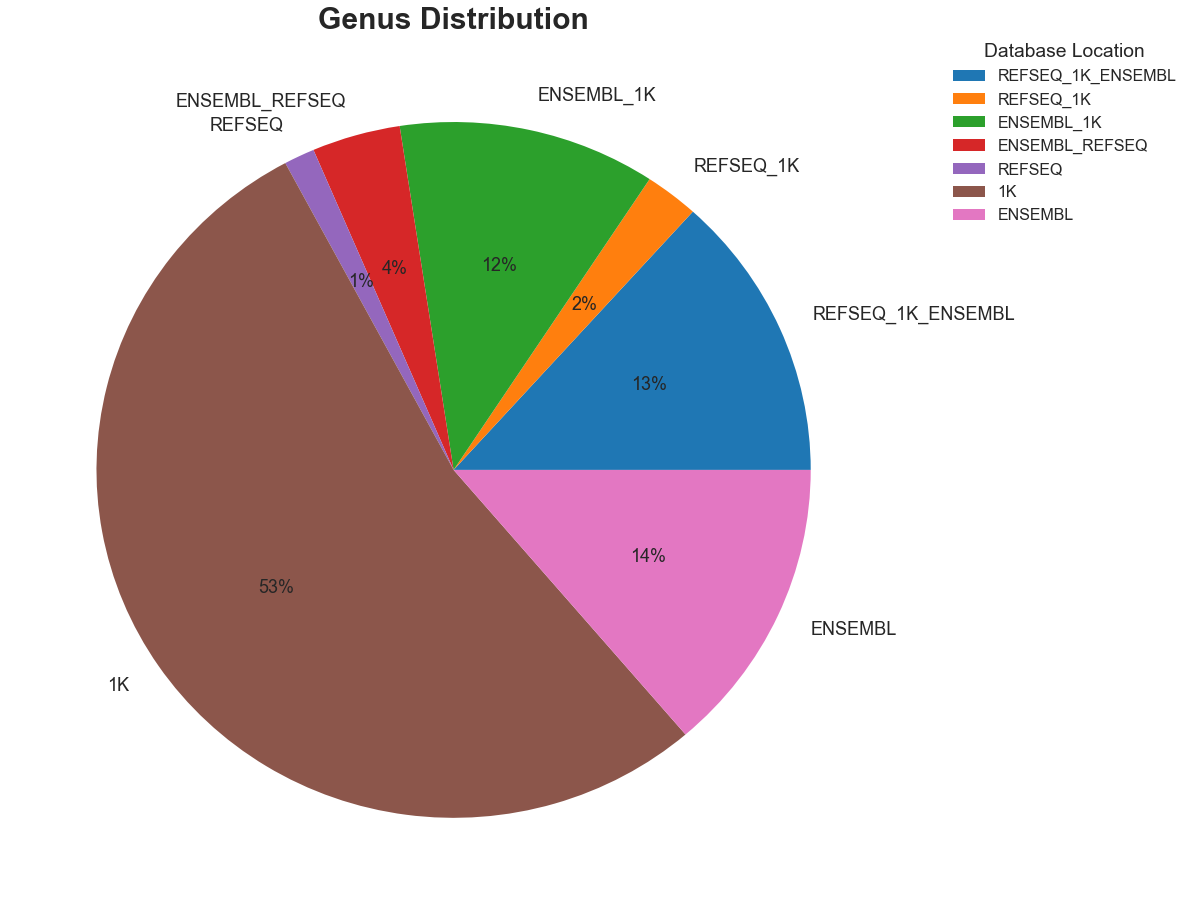

In [41]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

occur_once = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0

for index, row in occur_twice.iterrows():
    SPECIESTAXID = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE SPECIESTAXID = {SPECIESTAXID}", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print(ENSEMBLE_1K)
print(ENSEMBLE_NCBI)
print(NCBI_1K)



print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)


NCBI = pd.read_sql_query("SELECT DISTINCT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK = pd.read_sql_query("SELECT DISTINCT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL = pd.read_sql_query("SELECT DISTINCT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)     


import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

df = pd.DataFrame({'': [occur_thrice.size, NCBI_1K, ENSEMBLE_1K, ENSEMBLE_NCBI, NCBI.size, ONEK.size, ENSEMBL.size]},
                  index=['REFSEQ_1K_ENSEMBL', 'REFSEQ_1K', 'ENSEMBL_1K', 'ENSEMBL_REFSEQ', 'REFSEQ', '1K', 'ENSEMBL'])




plot = df.plot.pie(autopct='%1.0f%%', labeldistance=1.1, fontsize=18, subplots = "true", figsize=(16, 16))
plt.legend(borderaxespad=0.1, loc=2, bbox_to_anchor=(1.05, 1), title = 'Database Location')
plt.title('Genus Distribution',fontweight = 'bold', fontsize = 30)

g=sns.despine()
plt.show(g)


# Species contained in three, two and one database: Venn Diagram

134
46
28
809
222
153
16
614
158
FungiDB:
21


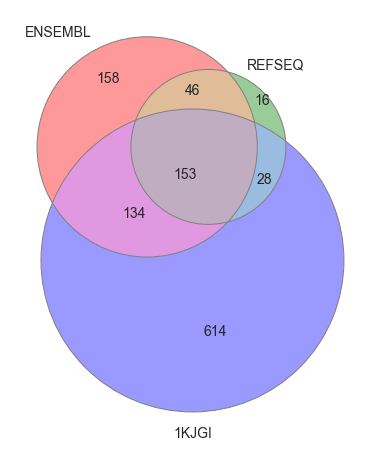

In [57]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv


cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')




# print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", cnx))
      

#       SELECT name FROM sqlite_master WHERE type='table'
      
occur_once = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

occur_quad = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 4", cnx)


ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0



for index, row in occur_twice.iterrows():
    SPECIEStaxid = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid}", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print(ENSEMBLE_1K)
print(ENSEMBLE_NCBI)
print(NCBI_1K)


print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)


NCBI = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

FUNGIDB = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'FUNGIDB'", cnx)


print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)
print("FungiDB:")
print(FUNGIDB.size)

# VENN DIAGRAM
 
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

plt.figure(figsize=(8,8))


g=sns.set_style("white")
g=sns.set_context("poster")
# Make the diagram
out = venn3(subsets = (ENSEMBL.size, NCBI.size, ENSEMBLE_NCBI, ONEK.size, ENSEMBLE_1K, NCBI_1K, occur_thrice.size), set_labels = ('ENSEMBL', 'REFSEQ', '1KJGI'))
plt.title("", fontsize = 20, fontweight = 'bold', pad = 20, loc = 'center')


# Line style: can be 'dashed' or 'dotted' for example
outline = venn3_circles(subsets = (ENSEMBL.size, NCBI.size, ENSEMBLE_NCBI, ONEK.size, ENSEMBLE_1K, NCBI_1K, occur_thrice.size), linestyle='solid', linewidth=1, color="grey")


for text in out.set_labels:
    text.set_fontsize(14)
for text in out.subset_labels:
    text.set_fontsize(14)
    

g=sns.despine()
plt.savefig("species_overlap.pdf", bbox_inches='tight')
plt.show(g)


16
614
158
FungiDB:
21
134
46
28
10
3
1
809
222
153
44


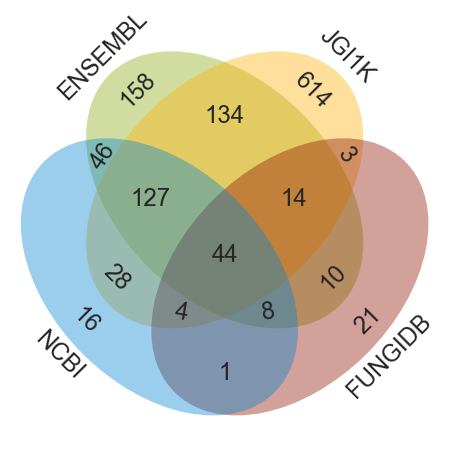

In [8]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')
      
occur_once = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

occur_quad = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 4", cnx)


# Combos of one
ENSEMBL = 0 
ONEK = 0 
NCBI = 0 
FUNGIDB = 0 


NCBI = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

FUNGIDB = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'FUNGIDB'", cnx)


print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)
print("FungiDB:")
print(FUNGIDB.size)



# combos of two
ENSEMBL_ONEK = 0 
ENSEMBL_NCBI = 0 
ONEK_NCBI = 0 
ENSEMBL_FUNGIDB = 0 
ONEK_FUNGIDB = 0 
NCBI_FUNGIDB = 0


for index, row in occur_twice.iterrows():
    SPECIEStaxid = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1:  
        ENSEMBL_ONEK += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_NCBI += 1
    if NCBI_tmp == 1 and ONEK_tmp == 1: 
        ONEK_NCBI += 1        
    if ENSEMBL_tmp == 1 and FUNGIDB_tmp == 1:
        ENSEMBL_FUNGIDB += 1  
    if ONEK_tmp == 1 and FUNGIDB_tmp == 1:
        ONEK_FUNGIDB += 1
    if NCBI_tmp == 1 and FUNGIDB_tmp == 1:
        NCBI_FUNGIDB += 1 

print(ENSEMBL_ONEK)
print(ENSEMBL_NCBI)
print(ONEK_NCBI)
print(ENSEMBL_FUNGIDB)
print(ONEK_FUNGIDB)
print(NCBI_FUNGIDB)


# Combos of three
ENSEMBL_ONEK_NCBI = 0 
ENSEMBL_ONEK_FUNGIDB = 0 
ENSEMBL_NCBI_FUNGIDB = 0 
ONEK_NCBI_FUNGIDB = 0

for index, row in occur_thrice.iterrows():
    SPECIEStaxid = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_ONEK_NCBI += 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and FUNGIDB_tmp == 1:  
        ENSEMBL_ONEK_FUNGIDB += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1 and FUNGIDB_tmp == 1: 
        ENSEMBL_NCBI_FUNGIDB += 1
    if ONEK_tmp == 1 and NCBI_tmp ==1 and FUNGIDB_tmp == 1:
        ONEK_NCBI_FUNGIDB += 1

        


# combos of four
ENSEMBL_ONEK_NCBI_FUNGIDB = occur_quad.size


print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)
print(occur_quad.size)


import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4
%matplotlib inline


# Combinations
sets = 'ENSEMBL 1K NCBI FUNGIDB'.split()
subsets = [ENSEMBL.size, ONEK.size, NCBI.size, FUNGIDB.size, ENSEMBL_ONEK, ENSEMBL_NCBI, ENSEMBL_FUNGIDB, ONEK_NCBI, ONEK_FUNGIDB, NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI, ENSEMBL_ONEK_FUNGIDB, ENSEMBL_NCBI_FUNGIDB, ONEK_NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI_FUNGIDB]

fig, axes = plt.subplots(figsize=(24, 8))
ax = axes
out = venn4(subsets, ax=ax, set_labels = ('ENSEMBL', 'JGI1K', 'NCBI', 'FUNGIDB'), set_label_fontsize=24, subset_label_fontsize=24);

#venn3(font_size(24))

# for text in out.subset:
#     text.set_fontsize(14)
    
# ax.set_title('', fontsize=24)
plt.savefig('SPECIES_Distribution.png', bbox_inches='tight')

# GENUS contained in three, two and one database: PIE CHART


ENSEMBLE_1K GENUS OVERLAP 97
ENSEMBLE_NCBI GENUS OVERLAP 17
NCBI_1K GENUS OVERLAP 12
TOTAL_NUMBER_OF_DISTINCT_GENUSES 714
GENUS_THAT_OCCUR_ONCE 452
GENUS_THAT_OCCUR_TWICE 128
GENUS THAT OCCUR IN ALL THREE DATABASES 99
SPECIES THAT OCCUR IN ALL THREE DATABASES 153
   COUNT(Distinct GENUSNAME)    DBNAME
0                        631        1K
1                        290  ENSEMBLE
2                         56   FUNGIDB
3                        168      NCBI
DELIM
GENUS_THAT_OCCUR_in_only_one_database 452
NCBI_GENUS_ONLY 8
ONEK_GENUS_ONLY 393
ENSEMBL_GENUS_ONLY 41


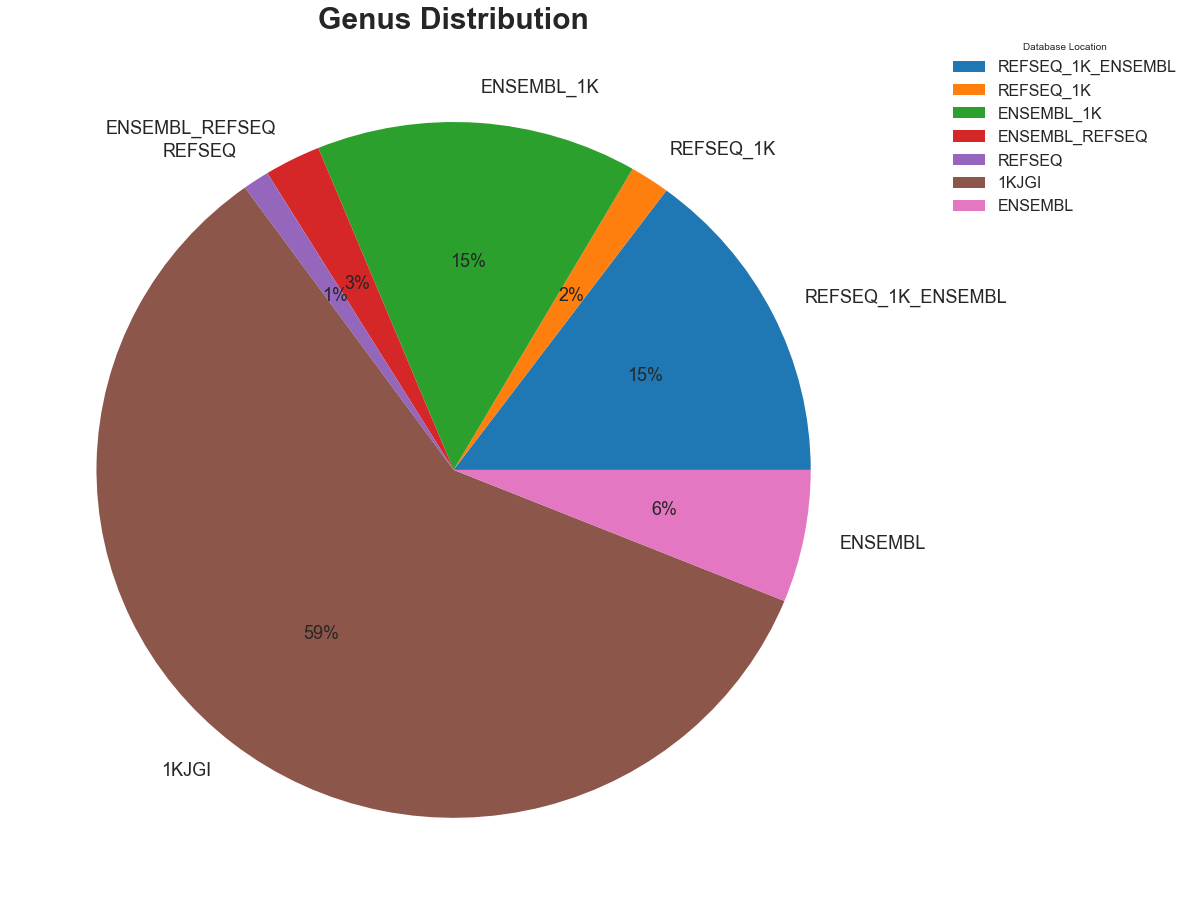

In [59]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

TOTAL_NUMBER_OF_DISTINCT_GENUSES = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB", cnx)

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

GENUS_THAT_OCCUR_TWICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

GENUS_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0

for index, row in GENUS_THAT_OCCUR_TWICE.iterrows():
    genus_name = row["GENUSNAME"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE GENUSNAME = '{genus_name}'", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print('ENSEMBLE_1K GENUS OVERLAP', ENSEMBLE_1K)
print('ENSEMBLE_NCBI GENUS OVERLAP', ENSEMBLE_NCBI)
print('NCBI_1K GENUS OVERLAP', NCBI_1K)
if ENSEMBLE_1K + ENSEMBLE_NCBI + NCBI_1K == GENUS_THAT_OCCUR_TWICE.size:
    print("true")


print('TOTAL_NUMBER_OF_DISTINCT_GENUSES', TOTAL_NUMBER_OF_DISTINCT_GENUSES.size)
print('GENUS_THAT_OCCUR_ONCE', GENUS_THAT_OCCUR_ONCE.size)
print('GENUS_THAT_OCCUR_TWICE', GENUS_THAT_OCCUR_TWICE.size)
print("GENUS THAT OCCUR IN ALL THREE DATABASES",GENUS_THAT_OCCUR_THRICE.size)
if GENUS_THAT_OCCUR_ONCE.size + GENUS_THAT_OCCUR_TWICE.size + GENUS_THAT_OCCUR_THRICE.size == TOTAL_NUMBER_OF_DISTINCT_GENUSES.size:
    print("true")


SPECIES_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)
print("SPECIES THAT OCCUR IN ALL THREE DATABASES",SPECIES_THAT_OCCUR_THRICE.size)

    
# GENUS_THAT_OCCUR_THRICE.head()
# print(SPECIES_THAT_OCCUR_THRICE.head())
    
Distinct_genuses_in_each_databses = pd.read_sql_query("SELECT COUNT(Distinct GENUSNAME), DBNAME FROM SPECIESDB group by DBNAME ", cnx)
print(Distinct_genuses_in_each_databses)
    
print("DELIM")

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

NCBI_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

print('GENUS_THAT_OCCUR_in_only_one_database',GENUS_THAT_OCCUR_ONCE.size)
print('NCBI_GENUS_ONLY',NCBI_GENUS_ONLY.size)
print('ONEK_GENUS_ONLY',ONEK_GENUS_ONLY.size)
print('ENSEMBL_GENUS_ONLY',ENSEMBL_GENUS_ONLY.size) 
if NCBI_GENUS_ONLY.size + ONEK_GENUS_ONLY.size + ENSEMBL_GENUS_ONLY.size == GENUS_THAT_OCCUR_ONCE.size:
    print("true")

    
# PIE CHART 
df = pd.DataFrame({'': [GENUS_THAT_OCCUR_THRICE.size, NCBI_1K, ENSEMBLE_1K, ENSEMBLE_NCBI, NCBI_GENUS_ONLY.size, ONEK_GENUS_ONLY.size, ENSEMBL_GENUS_ONLY.size]},
                  index=['REFSEQ_1K_ENSEMBL', 'REFSEQ_1K', 'ENSEMBL_1K', 'ENSEMBL_REFSEQ', 'REFSEQ', '1KJGI', 'ENSEMBL'])


plot = df.plot.pie(autopct='%1.0f%%', labeldistance=1.1, fontsize=18, subplots = "true", figsize=(16, 16))
plt.legend(borderaxespad=0.1, loc=2, bbox_to_anchor=(1.05, 1), title = 'Database Location')
plt.title('Genus Distribution',fontweight = 'bold', fontsize = 30)


g=sns.despine()
plt.show(g)



# GENUS contained in three, two and one database: Venn Diagram


ENSEMBLE_1K GENUS OVERLAP 97
ENSEMBLE_NCBI GENUS OVERLAP 17
NCBI_1K GENUS OVERLAP 12
TOTAL_NUMBER_OF_DISTINCT_GENUSES 714
GENUS_THAT_OCCUR_ONCE 452
GENUS_THAT_OCCUR_TWICE 128
GENUS THAT OCCUR IN ALL THREE DATABASES 99
SPECIES THAT OCCUR IN ALL THREE DATABASES 153
   COUNT(Distinct GENUSNAME)    DBNAME
0                        631        1K
1                        290  ENSEMBLE
2                         56   FUNGIDB
3                        168      NCBI
DELIM
GENUS_THAT_OCCUR_in_only_one_database 452
NCBI_GENUS_ONLY 8
ONEK_GENUS_ONLY 393
ENSEMBL_GENUS_ONLY 41


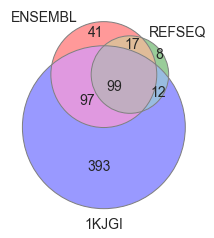

In [60]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

TOTAL_NUMBER_OF_DISTINCT_GENUSES = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB", cnx)

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

GENUS_THAT_OCCUR_TWICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

GENUS_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0

for index, row in GENUS_THAT_OCCUR_TWICE.iterrows():
    genus_name = row["GENUSNAME"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE GENUSNAME = '{genus_name}'", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print('ENSEMBLE_1K GENUS OVERLAP', ENSEMBLE_1K)
print('ENSEMBLE_NCBI GENUS OVERLAP', ENSEMBLE_NCBI)
print('NCBI_1K GENUS OVERLAP', NCBI_1K)
if ENSEMBLE_1K + ENSEMBLE_NCBI + NCBI_1K == GENUS_THAT_OCCUR_TWICE.size:
    print("true")


print('TOTAL_NUMBER_OF_DISTINCT_GENUSES', TOTAL_NUMBER_OF_DISTINCT_GENUSES.size)
print('GENUS_THAT_OCCUR_ONCE', GENUS_THAT_OCCUR_ONCE.size)
print('GENUS_THAT_OCCUR_TWICE', GENUS_THAT_OCCUR_TWICE.size)
print("GENUS THAT OCCUR IN ALL THREE DATABASES",GENUS_THAT_OCCUR_THRICE.size)
if GENUS_THAT_OCCUR_ONCE.size + GENUS_THAT_OCCUR_TWICE.size + GENUS_THAT_OCCUR_THRICE.size == TOTAL_NUMBER_OF_DISTINCT_GENUSES.size:
    print("true")


SPECIES_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)
print("SPECIES THAT OCCUR IN ALL THREE DATABASES",SPECIES_THAT_OCCUR_THRICE.size)

    
# GENUS_THAT_OCCUR_THRICE.head()
# print(SPECIES_THAT_OCCUR_THRICE.head())
    
Distinct_genuses_in_each_databses = pd.read_sql_query("SELECT COUNT(Distinct GENUSNAME), DBNAME FROM SPECIESDB group by DBNAME ", cnx)
print(Distinct_genuses_in_each_databses)
    
print("DELIM")

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

NCBI_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

print('GENUS_THAT_OCCUR_in_only_one_database',GENUS_THAT_OCCUR_ONCE.size)
print('NCBI_GENUS_ONLY',NCBI_GENUS_ONLY.size)
print('ONEK_GENUS_ONLY',ONEK_GENUS_ONLY.size)
print('ENSEMBL_GENUS_ONLY',ENSEMBL_GENUS_ONLY.size) 
if NCBI_GENUS_ONLY.size + ONEK_GENUS_ONLY.size + ENSEMBL_GENUS_ONLY.size == GENUS_THAT_OCCUR_ONCE.size:
    print("true")

# VENN DIAGRAM
 
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

plt.figure(figsize=(4,4))

g=sns.set_style("white")
g=sns.set_context("poster")

# Make the diagram
out = venn3(subsets = (ENSEMBL_GENUS_ONLY.size, NCBI_GENUS_ONLY.size, ENSEMBLE_NCBI, ONEK_GENUS_ONLY.size, ENSEMBLE_1K, NCBI_1K, GENUS_THAT_OCCUR_THRICE.size), set_labels = ('ENSEMBL', 'REFSEQ', '1KJGI'))
plt.title("", fontsize = 20, fontweight = 'bold', pad = 20, loc = 'center')

# Line style: can be 'dashed' or 'dotted' for example
outline = venn3_circles(subsets = (ENSEMBL_GENUS_ONLY.size, NCBI_GENUS_ONLY.size, ENSEMBLE_NCBI, ONEK_GENUS_ONLY.size, ENSEMBLE_1K, NCBI_1K, GENUS_THAT_OCCUR_THRICE.size), linestyle='solid', linewidth=1, color="grey")

for text in out.set_labels:
    text.set_fontsize(14)
for text in out.subset_labels:
    text.set_fontsize(14)
    


g=sns.despine()
plt.savefig("genus_overlap.pdf", bbox_inches='tight')
plt.show(g)

# Genus, but with FungiDB now too!!!

7
388
38
FungiDB:
10
96
17
12
1
0
1
443
127
99
35


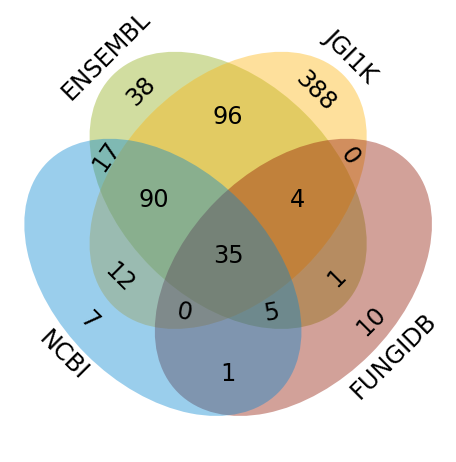

In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')
      
occur_once = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

occur_quad = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 4", cnx)


# Combos of one
ENSEMBL = 0 
ONEK = 0 
NCBI = 0 
FUNGIDB = 0 


NCBI = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

FUNGIDB = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'FUNGIDB'", cnx)


print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)
print("FungiDB:")
print(FUNGIDB.size)



# combos of two
ENSEMBL_ONEK = 0 
ENSEMBL_NCBI = 0 
ONEK_NCBI = 0 
ENSEMBL_FUNGIDB = 0 
ONEK_FUNGIDB = 0
NCBI_FUNGIDB = 0


for index, row in occur_twice.iterrows():
    GENUStaxid = row["GENUSTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE GENUSTAXID = {GENUStaxid}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1:  
        ENSEMBL_ONEK += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_NCBI += 1
    if NCBI_tmp == 1 and ONEK_tmp == 1: 
        ONEK_NCBI += 1        
    if ENSEMBL_tmp == 1 and FUNGIDB_tmp == 1:
        ENSEMBL_FUNGIDB += 1  
    if ONEK_tmp == 1 and FUNGIDB_tmp == 1:
        ONEK_FUNGIDB += 1
    if NCBI_tmp == 1 and FUNGIDB_tmp == 1:
        NCBI_FUNGIDB += 1 

print(ENSEMBL_ONEK)
print(ENSEMBL_NCBI)
print(ONEK_NCBI)
print(ENSEMBL_FUNGIDB)
print(ONEK_FUNGIDB)
print(NCBI_FUNGIDB)


# Combos of three
ENSEMBL_ONEK_NCBI = 0 
ENSEMBL_ONEK_FUNGIDB = 0 
ENSEMBL_NCBI_FUNGIDB = 0 
ONEK_NCBI_FUNGIDB = 0

for index, row in occur_thrice.iterrows():
    GENUStaxid = row["GENUSTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE GENUSTAXID = {GENUStaxid}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_ONEK_NCBI += 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and FUNGIDB_tmp == 1:  
        ENSEMBL_ONEK_FUNGIDB += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1 and FUNGIDB_tmp == 1: 
        ENSEMBL_NCBI_FUNGIDB += 1
    if ONEK_tmp == 1 and NCBI_tmp ==1 and FUNGIDB_tmp == 1:
        ONEK_NCBI_FUNGIDB += 1

        

        
# combos of four
ENSEMBL_ONEK_NCBI_FUNGIDB = occur_quad.size


print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)
print(occur_quad.size)


import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4
%matplotlib inline


# Combinations
sets = 'ENSEMBL 1K NCBI FUNGIDB'.split()
subsets = [ENSEMBL.size, ONEK.size, NCBI.size, FUNGIDB.size, ENSEMBL_ONEK, ENSEMBL_NCBI, ENSEMBL_FUNGIDB, ONEK_NCBI, ONEK_FUNGIDB, NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI, ENSEMBL_ONEK_FUNGIDB, ENSEMBL_NCBI_FUNGIDB, ONEK_NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI_FUNGIDB]

fig, axes = plt.subplots(figsize=(24, 8))
ax = axes
out = venn4(subsets, ax=ax, set_labels = ('ENSEMBL', 'JGI1K', 'NCBI', 'FUNGIDB'), set_label_fontsize=24, subset_label_fontsize=24);


# ax.set_title('', fontsize=24)
plt.savefig('GENUS_Distribution.png', bbox_inches='tight')

# Histogram of length distribution

    Chromosomes and contigs

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)


NCBI_chr = []
NCBI_contig = []
ONEK_chr = []
ONEK_contig = []
ENSEMBL_chr = []
ENSEMBL_contig  = []

#  divided by 1 million to correct y axis to be terms of millions
for index, row in ncbi.iterrows():
    if row["avg_length_chromosomes"] > 0:
        NCBI_chr.append(row["avg_length_chromosomes"])
    if row["avg_length_contig"] > 0:
        NCBI_contig.append(row["avg_length_contig"])

for index, row in onek.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ONEK_chr.append(row["avg_length_chromosomes"])
    if row["avg_length_contig"] > 0:
        ONEK_contig.append(row["avg_length_contig"])
        
for index, row in ensembl.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ENSEMBL_chr.append(row["avg_length_chromosomes"])
    if row["avg_length_contig"] > 0:
        ENSEMBL_contig.append(row["avg_length_contig"])

        
ncbi_chr_l = 0
ncbi_chr_mean = 0
for length in NCBI_chr:
    ncbi_chr_mean += length
    ncbi_chr_l += length
ncbi_chr_mean = ncbi_chr_mean / (len(NCBI_chr) * 1.0)

ncbi_contig_l = 0
ncbi_contig_mean = 0
for length in NCBI_contig:
    ncbi_contig_mean += length
    ncbi_contig_l += length
ncbi_contig_mean = ncbi_contig_mean / (len(NCBI_contig) * 1.0)

ncbi_combined = ncbi_contig_l + ncbi_chr_l
ncbi_combined_mean = ncbi_combined / ((len(NCBI_contig) + len(NCBI_chr)) * 1.0)


print("mean length chromosomes NCBI:", ncbi_chr_mean )
print("mean length contigs NCBI:", ncbi_contig_mean)

onek_chr_l = 0
onek_chr_mean = 0
for length in ONEK_chr:
    onek_chr_mean += length
    onek_chr_l += length
onek_chr_mean = onek_chr_mean / (len(ONEK_chr) * 1.0)

onek_contig_l = 0
onek_contig_mean = 0
for length in ONEK_contig:
    onek_contig_mean += length
    onek_contig_l += length
onek_contig_mean = onek_contig_mean / (len(ONEK_contig) * 1.0)

onek_combined = onek_contig_l + onek_chr_l
onek_combined_mean = onek_combined / ((len(ONEK_contig) + len(ONEK_chr)) * 1.0)

print("mean length chromosomes ONEK:", onek_chr_mean)
print("mean length contigs ONEK:", onek_contig_mean)


e_chr_l = 0
ensembl_chr_mean = 0
for length in ENSEMBL_chr:
    ensembl_chr_mean += length
    e_chr_l += length
ensembl_chr_mean = ensembl_chr_mean / (len(ENSEMBL_chr) * 1.0)


e_cont_l = 0
ensembl_contig_mean = 0
for length in ENSEMBL_contig:
    ensembl_contig_mean += length
    e_cont_l += length
ensembl_contig_mean = ensembl_contig_mean / (len(ENSEMBL_contig) * 1.0)

e_combined = e_cont_l + e_chr_l
e_combined_mean = e_combined / ((len(ENSEMBL_contig) + len(ENSEMBL_chr)) * 1.0)

print("mean length chromosomes ENSEMBL:", ensembl_chr_mean)
print("mean length contigs ENSEMBL:", ensembl_contig_mean)
 

print("Combined chromsome and contig mean:")
print("mean length combined chromosomes and contigs NCBI:", ncbi_combined_mean )
print("mean length combined chromosomes and contigs ONEK:", onek_combined_mean )        
print("mean length combined chromosomes and contigs ENSEMBL:", e_combined_mean)  

mean length chromosomes NCBI: 1673192.64
mean length contigs NCBI: 535825.4900990099
mean length chromosomes ONEK: 2105765.6315789474
mean length contigs ONEK: 433077.5096839959
mean length chromosomes ENSEMBL: 1452887.1968911916
mean length contigs ENSEMBL: 348216.0987841945
Combined chromsome and contig mean:
mean length combined chromosomes and contigs NCBI: 843776.8844765343
mean length combined chromosomes and contigs ONEK: 464858.584
mean length combined chromosomes and contigs ENSEMBL: 598746.6768507638


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)
fungidb = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'FUNGIDB'", cnx)



NCBI_chr = []
NCBI_contig = []
ONEK_chr = []
ONEK_contig = []
ENSEMBL_chr = []
ENSEMBL_contig  = []
FUNGIDB_chr = []
FUNGIDB_contig = []

#  divided by 1 million to correct y axis to be terms of millions
for index, row in ncbi.iterrows():
    if row["avg_length_chromosomes"] > 0:
        NCBI_chr.append(row["avg_length_chromosomes"] / 1000000.0)
    if row["avg_length_contig"] > 0:
        NCBI_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in onek.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ONEK_chr.append(row["avg_length_chromosomes"] / 1000000.0)
    if row["avg_length_contig"] > 0:
        ONEK_contig.append(row["avg_length_contig"] / 1000000.0)
        
for index, row in ensembl.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ENSEMBL_chr.append(row["avg_length_chromosomes"] / 1000000.0)
    if row["avg_length_contig"] > 0:
        ENSEMBL_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in fungidb.iterrows():
    if row["avg_length_chromosomes"] > 0:
        FUNGIDB_chr.append(row["avg_length_chromosomes"] / 1000000.0)
    if row["avg_length_contig"] > 0:
        FUNGIDB_contig.append(row["avg_length_contig"] / 1000000.0)



file=open('chr.contig.length.csv','w')
file.write('db,type,length\n')

for i in NCBI_chr:
    if i!=0:
        file.write('REFSEQ,chr,'+str(i))
        file.write("\n")

for i in NCBI_contig:
    if i!=0:
        file.write('REFSEQ,contig,'+str(i))
        file.write("\n")

for i in ENSEMBL_chr:
    if i!=0:
        file.write('ENSEMBL,chr,'+str(i))
        file.write("\n")

for i in ENSEMBL_contig:
    if i!=0:
        file.write('ENSEMBL,contig,'+str(i))
        file.write("\n")
        
for i in ONEK_chr:
    if i!=0:
        file.write('JGI1K,chr,'+str(i))
        file.write("\n")

for i in ONEK_contig:
    if i!=0:
        file.write('JGI1K,contig,'+str(i))
        file.write("\n")
        
for i in FUNGIDB_chr:
    if i!=0:
        file.write('FUNGIDB,chr,'+str(i))
        file.write("\n")

for i in FUNGIDB_contig:
    if i!=0:
        file.write('FUNGIDB,contig,'+str(i))
        file.write("\n")
        
file.close()

In [8]:
import pandas as pd
data=pd.read_csv('chr.contig.length.csv')
data.tail()

,db,type,length
2266,FUNGIDB,contig,0.646868
2267,FUNGIDB,contig,0.440911
2268,FUNGIDB,contig,0.044244
2269,FUNGIDB,contig,0.004254
2270,FUNGIDB,contig,0.515901


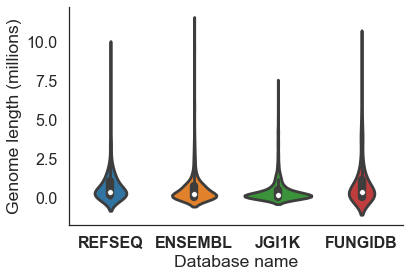

In [9]:
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

ax = sns.violinplot(y="length", x="db", data=data)
ax.set(ylabel='Genome length (millions)', xlabel='Database name')

ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')

g=sns.despine()
plt.savefig("genome.length.pdf", bbox_inches='tight')

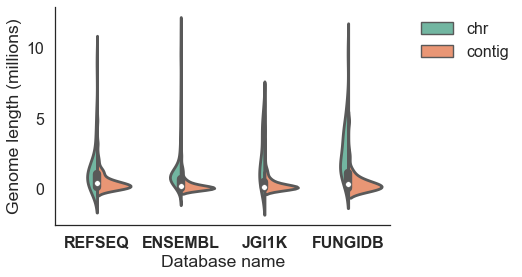

In [10]:
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

ax = sns.violinplot(y="length", x="db", hue="type", data=data, palette="Set2", split=True)
ax.set(ylabel='Genome length (millions)', xlabel='Database name')

ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')
ax.legend(borderaxespad=0.5, loc=2, bbox_to_anchor=(1.05, 1))

g=sns.despine()
plt.savefig("supplementary_fig_1/split.chr.contig.length.pdf", bbox_inches='tight')


    CHROMSOMES

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)
fungidb = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'FUNGIDB'", cnx)


NCBI_chr = []
ONEK_chr = []
ENSEMBL_chr = []
FUNGIDB_chr = []


#  divided by 1 million to correct y axis to be terms of millions
for index, row in ncbi.iterrows():
    if row["avg_length_chromosomes"] > 0:
        NCBI_chr.append(row["avg_length_chromosomes"] / 1000000.0)

for index, row in onek.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ONEK_chr.append(row["avg_length_chromosomes"] / 1000000.0)

for index, row in ensembl.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ENSEMBL_chr.append(row["avg_length_chromosomes"] / 1000000.0)

for index, row in fungidb.iterrows():
    if row["avg_length_chromosomes"] > 0:
        FUNGIDB_chr.append(row["avg_length_chromosomes"] / 1000000.0)


file=open('chr.length.csv','w')
file.write('db,type,length\n')

for i in NCBI_chr:
    if i!=0:
        file.write('REFSEQ,chr,'+str(i))
        file.write("\n")


for i in ENSEMBL_chr:
    if i!=0:
        file.write('ENSEMBL,chr,'+str(i))
        file.write("\n")
        
for i in ONEK_chr:
    if i!=0:
        file.write('JGI1K,chr,'+str(i))
        file.write("\n")
        
for i in FUNGIDB_chr:
    if i!=0:
        file.write('FUNGIDB,chr,'+str(i))
        file.write("\n")
        
        
file.close()


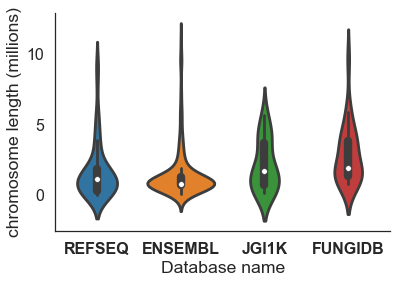

In [12]:
import seaborn as sns
import pandas as pd
chr_data=pd.read_csv('chr.length.csv')


g=sns.set_style("white")
g=sns.set_context("poster")

ax = sns.violinplot(y="length", x="db", data=chr_data)
ax.set(ylabel='chromosome length (millions)', xlabel='Database name')

ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')

g=sns.despine()
plt.savefig("supplementary_fig_1/chr.length.pdf", bbox_inches='tight')


        Only CONTIGS

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)
fungidb = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'FUNGIDB'", cnx)


NCBI_contig = []
ONEK_contig = []
ENSEMBL_contig  = []
FUNGIDB_contig = []

#  divided by 1 million to correct y axis to be terms of millions
for index, row in ncbi.iterrows():
    if row["avg_length_contig"] > 0:
        NCBI_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in onek.iterrows():
    if row["avg_length_contig"] > 0:
        ONEK_contig.append(row["avg_length_contig"] / 1000000.0)
        
for index, row in ensembl.iterrows():
    if row["avg_length_contig"] > 0:
        ENSEMBL_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in fungidb.iterrows():
    if row["avg_length_contig"] > 0:
        FUNGIDB_contig.append(row["avg_length_contig"] / 1000000.0)

        

file=open('contig.length.csv','w')
file.write('db,type,length\n')

for i in NCBI_contig:
    if i!=0:
        file.write('REFSEQ,contig,'+str(i))
        file.write("\n")


for i in ENSEMBL_contig:
    if i!=0:
        file.write('ENSEMBL,contig,'+str(i))
        file.write("\n")
        

for i in ONEK_contig:
    if i!=0:
        file.write('JGI1K,contig,'+str(i))
        file.write("\n")
        
for i in FUNGIDB_contig:
    if i!=0:
        file.write('FUNGIDB,contig,'+str(i))
        file.write("\n")
        
file.close()

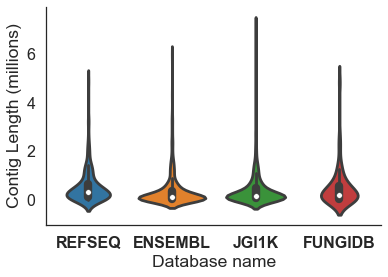

In [14]:
import seaborn as sns
import pandas as pd
contig_data=pd.read_csv('contig.length.csv')

# print(contig_data.head())

g=sns.set_style("white")
g=sns.set_context("poster")

ax = sns.violinplot(y="length", x="db", data=contig_data)
ax.set(ylabel='Contig Length (millions)', xlabel='Database name')

ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')

g=sns.despine()
plt.savefig("supplementary_fig_1/contig.length.pdf", bbox_inches='tight')




In [15]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')
# Create the connection
largest_max_contig_species = pd.read_sql_query("SELECT GENUSNAME, SPECIESNAME, DBNAME, MAX(max_length_contig) FROM speciesdb", cnx)
print(largest_max_contig_species)
largest_avg_contig_species = pd.read_sql_query("SELECT GENUSNAME, SPECIESNAME, DBNAME, MAX(avg_length_contig) FROM speciesdb", cnx)
print(largest_avg_contig_species)


species_contigs_in_one_chr_in_other = pd.read_sql_query("SELECT SPECIESNAME, DBNAME FROM speciesdb where SPECIEStaxid = 284813", cnx)

print(species_contigs_in_one_chr_in_other)



            GENUSNAME              SPECIESNAME    DBNAME  \
0  Rhizoctonia solani  Rhizoctonia solani AG-3  ENSEMBLE   

   MAX(max_length_contig)  
0                19365423  
                             GENUSNAME                 SPECIESNAME DBNAME  \
0  Fusarium sambucinum species complex  Fusarium pseudograminearum     1K   

   MAX(avg_length_contig)  
0                 7164496  
Empty DataFrame
Columns: [SPECIESNAME, DBNAME]
Index: []


    MITOCHONDRIA

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.war

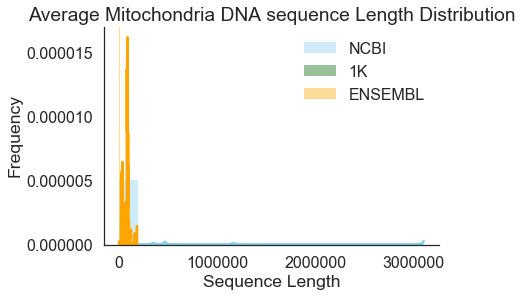

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)


NCBI = []
ONEK = []
ENSEMBL = []

for index, row in ncbi.iterrows():
     NCBI.append(row["avg_length_mtDNA"])

for index, row in onek.iterrows():
     ONEK.append(row["avg_length_mtDNA"])
        
for index, row in ensembl.iterrows():
     ENSEMBL.append(row["avg_length_mtDNA"])
        
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

sns.distplot( NCBI , color="skyblue", label="NCBI")
sns.distplot( ONEK , color="darkgreen", label="1K")
sns.distplot( ENSEMBL , color="orange", label="ENSEMBL")
plt.legend()
plt.title("Average Mitochondria DNA sequence Length Distribution")

plt.xlabel("Sequence Length")
plt.ylabel("Frequency")


g=sns.despine()
plt.show(g)


    PLASMIDS

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.war

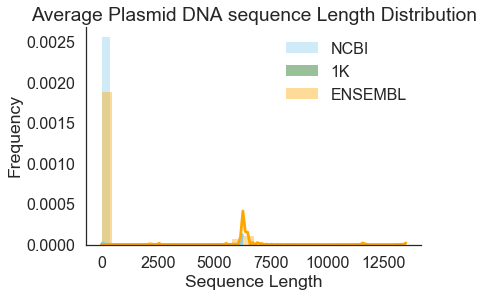

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)


NCBI = []
ONEK = []
ENSEMBL = []

for index, row in ncbi.iterrows():
     NCBI.append(row["avg_length_plasmids"])

for index, row in onek.iterrows():
     ONEK.append(row["avg_length_plasmids"])
        
for index, row in ensembl.iterrows():
     ENSEMBL.append(row["avg_length_plasmids"])
        
        
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

sns.distplot( NCBI , color="skyblue", label="NCBI")
sns.distplot( ONEK , color="darkgreen", label="1K")
sns.distplot( ENSEMBL , color="orange", label="ENSEMBL")
plt.legend()
plt.title("Average Plasmid DNA sequence Length Distribution")


plt.xlabel("Sequence Length")
plt.ylabel("Frequency")

g=sns.despine()
plt.show(g)


# shared in two: chrom and contig vs chrom chrom vs cont and cont
    # Comare if dna types are the same or different  for species present in two 

In [32]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

occur_twice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)
# print(occur_twice.size)


ENSEMBLE_NCBI = []
ENSEMBLE_1K = []
NCBI_1K = []

for index, row in occur_twice.iterrows():
    SPECIEStaxid = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid}", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K.append(SPECIEStaxid)
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI.append(SPECIEStaxid)
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K.append(SPECIEStaxid)    
        
# print(len(ENSEMBLE_1K))
# print(len(ENSEMBLE_NCBI))
# print(len(NCBI_1K))


# COMPARE ENSEMBLE AND 1K

for SPECIEStaxid in ENSEMBLE_1K:
    databases = pd.read_sql_query(f"SELECT SPECIESTAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count, avg_length_chromosomes, avg_length_contig FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid} ", cnx)
    print(databases)
    print("------------")


# # COMPARE ENSEMBLE AND NCBI
for SPECIEStaxid in ENSEMBLE_NCBI:
    databases = pd.read_sql_query(f"SELECT SPECIESTAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid} ", cnx)
    print(databases)
    print("------------")



# # COMPARE NCBI AND 1K
for SPECIEStaxid in NCBI_1K:
    databases = pd.read_sql_query(f"SELECT SPECIESTAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid} ", cnx)
    print(databases)
    print("------------")
    


   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0          4918  ENSEMBLE                 0           197            0   
1          4918        1K                 0           198            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              65004  
1              0                       0              64892  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0          5007  ENSEMBLE                 0           324            0   
1          5007        1K                 0            84            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              39775  
1              0                       0             162523  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0          5044  ENSEMBLE                 0           540            1   
1       

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         58631  ENSEMBLE                 0            20            0   
1         58631        1K                 0            20            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0             698750  
1              0                       0             701041  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         58641  ENSEMBLE                 5             2            0   
1         58641        1K                 0             0            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                 1890238             816534  
1              0                       0                  0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         60169  ENSEMBLE                 0            74            1   
1       

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        109633  ENSEMBLE                 0           414            0   
1        109633        1K                 0           414            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0             145909  
1              0                       0             146388  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        109899  ENSEMBLE                 0           546            0   
1        109899        1K                 0           546            0   
2        109899        1K                 0           827            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              70931  
1              0                       0              71163  
2              0                       0              45195  
------------
   SPECIESTAXID    D

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        310910  ENSEMBLE                 0           472            0   
1        310910        1K                 0           473            0   
2        310910        1K                 0            79            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0             107376  
1              0                       0             106923  
2              0                       0             653617  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        337075  ENSEMBLE                 0          1588            0   
1        337075        1K                 0          1588            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              32027  
1              0                       0              31949  
------------
   SPECIESTAXID    D

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0       1681229  ENSEMBLE                 0           103            0   
1       1681229        1K                 0           100            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0             744265  
1              0                       0             764283  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0       1858805  ENSEMBLE                 0            99            0   
1       1858805        1K                 0            99            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0             302961  
1              0                       0             303955  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0       2501646  ENSEMBLE                 0          2648            0   
1       

1              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        236234  ENSEMBLE                 0           181            0   
1        236234      NCBI                 0           181            0   

   plasmid_count  
0              0  
1              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        263815  ENSEMBLE                 0            20            0   
1        263815      NCBI                20             0            0   

   plasmid_count  
0              0  
1              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        273371  ENSEMBLE                 8             0            0   
1        273371      NCBI                 8             0            0   

   plasmid_count  
0              0  
1              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        324769

   SPECIESTAXID DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        288669   NCBI                 0            60            0   
1        288669     1K                 0            60            0   

   plasmid_count  
0              0  
1              0  
------------
   SPECIESTAXID DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        301854   NCBI                 0           116            0   
1        301854     1K                 0           116            0   

   plasmid_count  
0              0  
1              0  
------------
   SPECIESTAXID DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        319626   NCBI                 0           152            0   
1        319626     1K                 0           152            0   

   plasmid_count  
0              0  
1              0  
------------
   SPECIESTAXID DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        319627   NCBI                 0           138            0   
1     

# shared in Three:  chrom and contig vs chrom chrom vs cont and cont 
    # Comare if dna types are the same or different for species present in three

In [33]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

occur_thrice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

for index, row in occur_thrice.iterrows():
    SPECIESTAXID = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT SPECIESTAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count FROM SPECIESDB WHERE SPECIESTAXID = {SPECIESTAXID} ", cnx)
    print(databases)
    print("------------")

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0          4903  ENSEMBLE                 0             7            0   
1          4903  ENSEMBLE                 0            76            0   
2          4903      NCBI                 0            76            0   
3          4903        1K                 0            76            0   

   plasmid_count  
0              0  
1              0  
2              0  
3              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0          4924  ENSEMBLE                 8             0            0   
1          4924      NCBI                 8             0            0   
2          4924        1K                 9             0            0   

   plasmid_count  
0              0  
1              0  
2              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0          4926  ENSEMBLE                 0            10    

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         27973  ENSEMBLE                10             2            0   
1         27973      NCBI                12             0            0   
2         27973        1K                12             0            0   

   plasmid_count  
0              0  
1              0  
2              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         28583  ENSEMBLE                 0           101            0   
1         28583        1K                 0           101            0   
2         28583   FUNGIDB                 0           101            1   

   plasmid_count  
0              0  
1              0  
2              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         28985  ENSEMBLE                 6             0            0   
1         28985      NCBI                 6             0            1   
2     

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         45609  ENSEMBLE                 0            49            0   
1         45609      NCBI                 0            49            0   
2         45609        1K                 0            49            0   

   plasmid_count  
0              0  
1              0  
2              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         46472  ENSEMBLE                 0            51            0   
1         46472        1K                 0            51            0   
2         46472   FUNGIDB                 0            51            0   

   plasmid_count  
0              0  
1              0  
2              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         46583  ENSEMBLE                 0            16            0   
1         46583      NCBI                 0            16            0   
2     

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        104341  ENSEMBLE                 0          1242            0   
1        104341      NCBI                 0           549            0   
2        104341        1K                 0           549            0   
3        104341        1K                 0          1243            0   

   plasmid_count  
0              0  
1              0  
2              0  
3              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        104355  ENSEMBLE                 0           442            0   
1        104355      NCBI                 0           442            0   
2        104355        1K                 0           443            0   

   plasmid_count  
0              0  
1              0  
2              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        109264  ENSEMBLE                 0           450    

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        432096  ENSEMBLE                12             0            0   
1        432096      NCBI                12             0            0   
2        432096        1K                 0            12            0   

   plasmid_count  
0              0  
1              0  
2              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        460519  ENSEMBLE                 4             0            0   
1        460519  ENSEMBLE                 4             2            0   
2        460519  ENSEMBLE                 4             0            1   
3        460519  ENSEMBLE                 4             5            0   
4        460519      NCBI                 4             0            0   
5        460519        1K                 4             0            0   

   plasmid_count  
0              0  
1              1  
2              0  
3              1  


   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0       1873960  ENSEMBLE                 0            56            0   
1       1873960      NCBI                 0            56            0   
2       1873960        1K                 0            56            0   

   plasmid_count  
0              0  
1              0  
2              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0       2315449  ENSEMBLE                 0            25            0   
1       2315449      NCBI                 0            25            0   
2       2315449        1K                 0            25            0   

   plasmid_count  
0              0  
1              0  
2              0  
------------


# For the species that have the same dna types in each db, account for the cases where the species have different numbers of contigs and chromosomes between each database

In [34]:
raincloud length distribution

SyntaxError: invalid syntax (<ipython-input-34-ebf0dd973583>, line 1)

In [ ]:
Are the mitochondria present in refseq and ensembl for the same species? Same with complete chromosomes 

In [ ]:
import sqlite3
import pandas as pd
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("select SPECIESTAXID from SPECIESDB where dbname = '1K';", cnx)



# .headers on
# .mode csv
# .output onekSPECIESTAXID.csv
# select SPECIESTAXID from SPECIESDB where dbname = '1K';
# .quit

# .headers on
# .mode csv
# .output EnsemblkSPECIESTAXID.csv
# select SPECIESTAXID from SPECIESDB where dbname = 'ENSEMBLE';
# .quit



In [3]:
import sqlite3
import pandas as pd
import ete3
from ete3 import NCBITaxa


cnx = sqlite3.connect(r'../data/refSeqFungiStats-Copy1.db')

dbquerry = pd.read_sql_query("select GENUSTAXID from SPECIESDB where GENUSTAXID IS NOT NULL;", cnx)

ncbi_taxa = NCBITaxa()
for index, row in dbquerry.iterrows():
    genusID = row["GENUSTAXID"]
    OGID = genusID
    name = ncbi_taxa.get_taxid_translator([genusID])
    rank = ncbi_taxa.get_rank(name)
    lineage = ncbi_taxa.get_lineage(genusID)
    nope = ['family', 'order', 'class', 'phylum', 'kingdom'] # These levels are too far
    while((rank[genusID] == 'species' or rank[genusID] == 'species group' or rank[genusID] == 'no rank')):
        if ncbi_taxa.get_rank([lineage[-2]])[lineage[-2]] in nope: #if lineage passes genus, stop
            break
        genusID = lineage[-2] # -1 is the current taxid -2 is the next one (which we want)
        lineage = ncbi_taxa.get_lineage(genusID) #update the lineage
        name = ncbi_taxa.get_taxid_translator([genusID])
        rank = ncbi_taxa.get_rank(name)
    print(rank)
    pd.read_sql_query("UPDATE SPECIESDB SET GENUSTAXID = ? WHERE GENUSTAXID = ?;", cnx, params = [genusID, OGID])
    
    
#     while(rank[genusID] != 'genus'):
#         genusID = lineage[-1]
#         lineage = ncbi_taxa.get_lineage(genusID)
#         name = ncbi_taxa.get_taxid_translator([genusID])
#         rank = ncbi_taxa.get_rank(name)
# #         print("hello")
#     print(rank[genusID])
    
#     pd.read_sql_query("UPDATE SPECIESDB set GENUSTAXID = ?, GENUSNAME = ? WHERE SPECIESTAXID = ?", (genusID, name, OGID), cnx)
        


    
# name4 = ncbi.get_taxid_translator([28581])
# print(name4)
# print(ncbi.get_rank(name4))

# added STRAINTAXID Column
# changed STRAIN column to STRAINNAME 
# added GENUSNAME and GENUSTAXID columns
# changed TAXID column name SPECIESTAXID



# pd.read_sql_query(f"UPDATE SPECIESDB WHERE SPECIESTAXID = {SPECIESTAXID} WITH {newSPECIESTAXID}", cnx)

# This code does the following:
# ensures that species level SPECIESTAXIDs are associated with species, and strain SPECIESTAXID with strain.
# uses ncbi naming scheme to ensure all identical genus, species, and strains have consistent names.


# SPECIESTAXIDs = pd.read_sql_query("select SPECIESTAXID from SPECIESDB", cnx)


# def update_SPECIESTAXID(SPECIESTAXIDs)
#     ncbi_taxa = NCBITaxa()
#     for index, row in SPECIESTAXIDs.iterrows():
#         SPECIESTAXID = row["SPECIESTAXID"]
#         name = ncbi_taxa.get_taxid_translator(SPECIESTAXID)
#         rank = ncbi_taxa.get_rank(name)
#         if rank == 'species':
        
            
# def update_naming(SPECIESTAXIDs)





# print(SPECIESTAXIDs)


# ncbi = NCBITaxa()

# SPECIESTAXIDs =[28583]

# print(ncbi.get_taxid_translator([28583]))        

# name1 = ncbi.get_taxid_translator([28583])

# print(ncbi.get_rank(name1))

# print("   -----   ")

# lineage = ncbi.get_lineage(28583)

# print(lineage)

# print(lineage[-2])

# print(ncbi.get_taxid_translator([28583]))        

# name2 = ncbi.get_taxid_translator([28583])

# print(ncbi.get_rank(name2))




# print("DADSDDASDSDAS")



# print(ncbi.get_taxid_translator([578462]))        

# name1 = ncbi.get_taxid_translator([578462])

# print(name1)

# print(ncbi.get_rank([578462]))

# print("   -----   ")


# print(ncbi.get_lineage(578462))

# # print(ncbi.get_descendant_taxa(28583))

# print(ncbi.get_lineage(28583))
# name3 = ncbi.get_taxid_translator([28583])
# print(name3)
# print(ncbi.get_rank(name3))


# print(ncbi.get_lineage(28581))
# name4 = ncbi.get_taxid_translator([28581])
# print(name4)
# print(ncbi.get_rank(name4))

{4828: 'genus'}


DatabaseError: Execution failed on sql 'UPDATE SPECIESDB SET GENUSTAXID = ? WHERE GENUSTAXID = ?;': database is locked